# TP2 : Prediction of time series with a trend

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.ar_model import AutoReg

In [3]:
# Load the time series
dax = pd.read_csv('Dax_data.csv', index_col=0)
dax.index = pd.to_datetime(dax.index)
dax
# This time series represents the daily closing price of a German stock index from 
# the 1st of January 2017 to 19th of July 2017

,Value
2017-01-01,2562.19
2017-01-02,2578.36
2017-01-03,2572.06
2017-01-04,2551.80
2017-01-05,2570.44
...,...
2017-07-15,3302.57
2017-07-16,3374.93
2017-07-17,3439.22
2017-07-18,3407.83


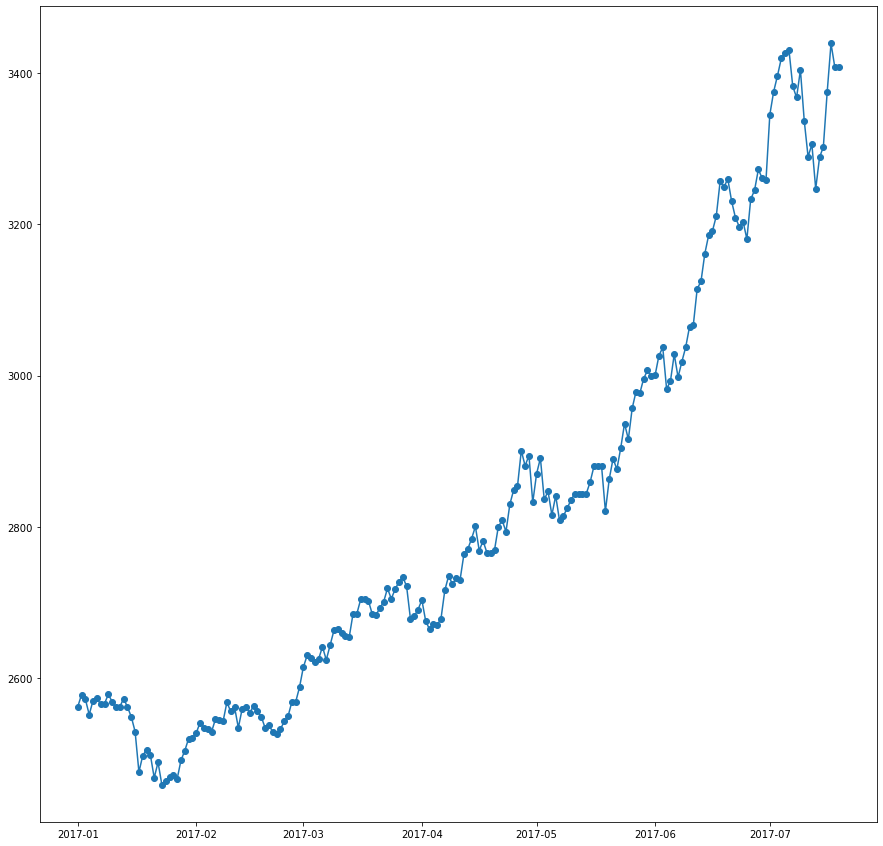

In [6]:
# Below is a plot of this time series
plt.figure(figsize = (15,15))
plt.plot(dax, marker = 'o')

In [ ]:
# We'll start by standardizing the values of this time series so that the mean is 0 and the standard deviation is 1:
# It is recommended to do this before using complicated models.
dax_standard = (dax - np.mean(dax))/np.std(dax)
# This operation is reversible if you need to come back to the original values afterwards

In [15]:
# Creation of a double exponential smoothing model on the training data:
from statsmodels.tsa.api import Holt
double_es = Holt(dax_train, initialization_method = "estimated").fit()
double_es.summary()
# When you ask for ' initialization_method = "estimated" ', the initial values of the algorithm (a and b) and the alpha 
# and beta parameter are chosen by python so that the intermediate predictions are the best.
# You can also ask to fix alpha and beta of your choice by specifying smoothing_level = 'what you want' and smoothing_trend = 'what you want'
# as parameters of the fit() function

/Users/smalinow/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


Dep. Variable:,Value,No. Observations:,173
Model:,Holt,SSE,68194.998
Optimized:,True,AIC,1041.992
Trend:,Additive,BIC,1054.606
Seasonal:,None,AICC,1042.498
Seasonal Periods:,None,Date:,"Thu, 11 Feb 2021"
Box-Cox:,False,Time:,09:25:31
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.8484944,alpha,True
smoothing_trend,0.0214291,beta,True


In [16]:
# for the level (called a in the CM)
double_es.level

2017-01-01    2562.506571
2017-01-02    2576.116435
2017-01-03    2572.873684
2017-01-04    2555.177098
2017-01-05    2568.250498
                 ...     
2017-06-18    3250.715933
2017-06-19    3250.614011
2017-06-20    3260.016056
2017-06-21    3236.440551
2017-06-22    3214.278023
Length: 173, dtype: float64

In [17]:
# for the trend (called b in the CM)
double_es.trend

2017-01-01    1.044966
2017-01-02    1.314221
2017-01-03    1.216569
2017-01-04    0.811277
2017-01-05    1.074043
                ...   
2017-06-18    7.985137
2017-06-19    7.811839
2017-06-20    7.845916
2017-06-21    7.172583
2017-06-22    6.543958
Length: 173, dtype: float64

In [20]:
double_es.forecast(2)

2017-06-23    3220.821981
2017-06-24    3227.365939
Freq: D, dtype: float64

## Classical Auto-regressive models

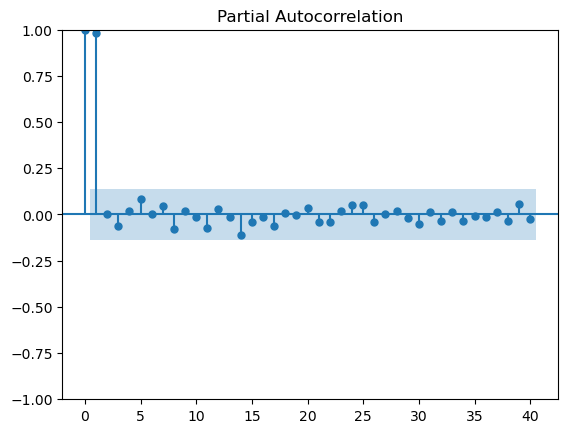

In [4]:
from statsmodels.graphics.tsaplots import plot_pacf
pacf = plot_pacf(dax, lags=40)
# The PACF is plotted.
# You should see that the last big coefficient is obtained for a lag of 1
# so we will use order 1 in the following

## Auto-regressive models with trend

In [38]:
#You can find this value automatically by the command : 
mod.forecast(1)

2017-06-23    3211.440915
Freq: D, dtype: float64